In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy as sp 
from scipy import stats 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train-data.csv')
df_test = pd.read_csv('test-data.csv')

In [3]:
df_train.head(5)

,Num,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df_test.head(5)

,Num,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:

df_train.drop('Num',axis=1,inplace=True)
df_test.drop('Num',axis=1,inplace=True)

In [6]:
df_train.shape

(6019, 13)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [8]:
df_train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
unique_cnt = list(map(lambda x: len(df_train[x].unique()), list(df_train)))
print('Unique counts in each column:')
dict(zip(list(df_train),unique_cnt))

Unique counts in each column:


{'Name': 1876,
 'Location': 11,
 'Year': 22,
 'Kilometers_Driven': 3093,
 'Fuel_Type': 5,
 'Transmission': 2,
 'Owner_Type': 4,
 'Mileage': 443,
 'Engine': 147,
 'Power': 373,
 'Seats': 10,
 'New_Price': 541,
 'Price': 1373}

# Data Cleaing

In [10]:
df_train.drop('New_Price',axis=1,inplace=True)

df_train.dropna(inplace=True)
print(df_train.shape)

(5975, 12)


In [11]:
def remove_units(data,col = None):
    for j in range(len(col)):
        data[col[j]] = data[col[j]].str.split().str[0]
    
remove_units(df_train,col = ['Name','Mileage','Engine','Power'])

In [12]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [13]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [14]:
for col in ['Mileage','Engine']:
    df_train[col] = df_train[col].astype(float)

In [15]:
df_train.Power.unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '115',
       '175.56', '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80',
       '67.1', '102', '108.45', '138.1', '184', '179.5', '103.5', '64',
       '82', '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92',
       '138.03', '112.2', '163.7', '71', '105', '174.33', '75', '103.2',
       '53.3', '78.9', '147.6', '147.8', '68', '186', '170', '69', '140',
       '78', '194', '500', '108.5', '86.8', '187.74', 'null', '132',
       '86.7', '73.94', '117.3', '218', '168.5', '89.84', '110', '90',
       '82.85', '67', '241.4', '35', '270.9', '126.32', '73', '130',
       '100.6', '150', '75.94', '215', '107.3', '37.48', '120', '178',
       '152', '91.1', '85.80', '362.07', '121.3', '143', '81.80', '171',
       '76.8', '103.52', '444', '362.9', '67.06', '120.7', '258', '81.86',
       '112', '88.73', '57.6', '157.75', '102.5', '201.1', '83.1',
       '6

In [16]:
df_train[df_train['Power'] == 'null']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,null,5.0,2.00
79,Hyundai,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,null,5.0,1.30
89,Hyundai,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,null,5.0,2.10
120,Hyundai,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,null,5.0,0.85
143,Hyundai,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,null,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Hyundai,Chennai,2007,79000,Petrol,Manual,First,17.00,1086.0,null,5.0,1.85
5873,Hyundai,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,null,5.0,1.20
5925,Skoda,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,null,5.0,2.85
5943,Mahindra,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,null,6.0,1.70


In [17]:
null_index = df_train[df_train['Power'] == 'null'].index
df_train.drop(null_index,inplace=True)

In [18]:
df_train.shape

(5872, 12)

In [19]:
df_train['Power'] = df_train['Power'].astype(float)

In [20]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [21]:
df_train['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

<Figure size 1080x432 with 0 Axes>

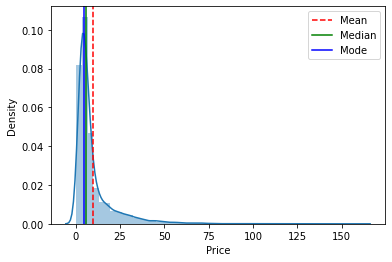

In [22]:
#checking the distribution of target variable


plt.figure(figsize=(15,6))

f,ax = plt.subplots(1, sharex=True,)
mean_price = df_train['Price'].mean()
median_price = df_train['Price'].median()
mode_price = df_train['Price'].mode().values[0]

sns.distplot(df_train['Price'],ax = ax)
ax.axvline(mean_price, color='r', linestyle='--', label="Mean")
ax.axvline(median_price, color='g', linestyle='-', label="Median")
ax.axvline(mode_price, color='b', linestyle='-', label="Mode")

ax.legend()
plt.xlim()
plt.show()

* Majority of cars having price around 5 - 10 Lakh.
* There are very minimum cars having price between 50 lakh to 160 lakh.
* We can see that mean price is greater than median of price, also long tail of distribution is longer on right hand side   as compared to left hand side which shows that distribution is positively skewed.

## Handiling Categorical Features

In [23]:
ordinal_col = 'Owner_Type'
nominal_col =['Location','Fuel_Type','Transmission']

df_train[ordinal_col].replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
dummies = pd.get_dummies(df_train[nominal_col],drop_first=True)

In [24]:
df_train = pd.concat([df_train,dummies],axis=1)
df_train.drop(nominal_col,axis=1,inplace=True)
df_train.drop('Name',axis=1,inplace=True)

In [25]:
#df_train.head()

In [26]:
def normalize(data,col=None):
    for col in col:
        data[col] = np.log1p(data[col])
        
normalize(df_train,col = ['Price'])

In [27]:
scaler = MinMaxScaler()
df_train[['Kilometers_Driven','Engine','Mileage','Power']] = scaler.fit_transform(df_train[
    ['Kilometers_Driven','Engine','Mileage','Power']])


In [28]:
df_train.drop('Power',axis=1,inplace=True)
df_train.drop('Year',axis=1,inplace=True)

In [29]:
df_train.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,0.011051,1,0.793083,0.069594,5.0,1.011601,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.006282,1,0.586464,0.178266,5.0,2.602690,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,0.007051,1,0.542636,0.106997,5.0,1.704748,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3,0.013359,1,0.619261,0.116115,7.0,1.945910,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.006231,2,0.453190,0.250093,5.0,2.930660,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [30]:
df_train.shape

(5872, 20)

### Preparing test Data

In [31]:
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [32]:
print('Shape of Test Data Before Dropping Any Row: ',df_test.shape)
df_test.drop('New_Price',axis=1,inplace=True)

df_test.dropna(inplace=True)

remove_units(df_test,col = ['Name','Mileage','Engine','Power'])


for col in ['Mileage','Engine']:
    df_test[col] = df_test[col].astype(float)

null_index_test = df_test[df_test['Power'] == 'null'].index
df_test.drop(null_index_test,inplace=True)   

df_test['Power'] = df_test['Power'].astype(float)

current_year = 2021
df_test['Age'] = current_year - df_test['Year']


df_test[ordinal_col].replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
dummies_test = pd.get_dummies(df_test[nominal_col],drop_first=True)

df_test = pd.concat([df_test,dummies_test],axis=1)

df_test.drop(nominal_col,axis=1,inplace=True)

df_test.drop('Name',axis=1,inplace=True) 

df_test[['Kilometers_Driven','Engine','Mileage','Power']] = scaler.transform(df_test[['Kilometers_Driven','Engine','Mileage','Power']])

df_test.drop('Power',axis=1,inplace=True) 
df_test.drop('Year',axis=1,inplace=True)
print('Shape of Test Data After Dropping Rows: ',df_test.shape)

Shape of Test Data Before Dropping Any Row:  (1234, 12)
Shape of Test Data After Dropping Rows:  (1201, 20)


In [33]:
from sklearn.preprocessing import MinMaxScaler
st = MinMaxScaler(feature_range = (0.5,0.9))
scaled_data = st.fit_transform(df_train)
scaled_data

array([[0.50442036, 0.5       , 0.81723315, ..., 0.5       , 0.5       ,
        0.9       ],
       [0.50251262, 0.5       , 0.73458557, ..., 0.5       , 0.5       ,
        0.9       ],
       [0.50282032, 0.5       , 0.71705426, ..., 0.5       , 0.9       ,
        0.9       ],
       ...,
       [0.50337418, 0.63333333, 0.66696482, ..., 0.5       , 0.5       ,
        0.9       ],
       [0.50282032, 0.5       , 0.7254025 , ..., 0.5       , 0.9       ,
        0.9       ],
       [0.50288186, 0.5       , 0.80339893, ..., 0.5       , 0.5       ,
        0.9       ]])

In [34]:
x_train = []
y_train = []
for i in range(7,5872):
    x_train.append(scaled_data[i-7:i,0])
    y_train.append(scaled_data[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

### Model Bulding

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train ,y_train,test_size = 0.2,random_state=40)

### Linear Regeression 

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import math
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

mse_lr = mean_squared_error(y_test,y_pred)
rmse_lr = math.sqrt(mse_lr)

In [37]:
mse_lr

6.269438805654583e-06

In [38]:
rmse_lr

0.0025038847428854594

In [39]:
actual_lr = y_test
predicted_lr = np.array(y_pred)

In [40]:
def mape(actual_lr , predicted_lr):
    actual_lr, predicted_lr = np.array(actual_lr),np.array(predicted_lr)
    return np.mean(np.abs((actual_lr-predicted_lr)/actual_lr))*100
lr_mape=mape(actual_lr,predicted_lr)
lr_mape

0.3103006916408642

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

mse_dt = mean_squared_error(y_test,y_pred_dt)
rmse_dt = math.sqrt(mse_dt)

In [42]:
mse_dt

1.1583259611782122e-05

In [43]:
rmse_dt

0.0034034188122801052

In [44]:
actual_dt=y_test
predicted_dt = y_pred_dt

In [45]:
def mape(actual_dt , predicted_dt):
    actual_dt, predicted_dt = np.array(actual_dt),np.array(predicted_dt)
    return np.mean(np.abs((actual_dt-predicted_dt)/actual_dt))*100
dt_mape=mape(actual_dt,predicted_dt)
dt_mape

0.43917475443429566

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor()
Rf.fit(x_train,y_train)
y_pred_Rf = Rf.predict(x_test)

mse_Rf = mean_squared_error(y_test,y_pred_Rf)
rmse_Rf = math.sqrt(mse_Rf)

In [47]:
mse_Rf

2.3091613384477938e-05

In [48]:
rmse_Rf

0.0048053733865827675

In [49]:
actual_Rf = y_test
predicted_Rf = y_pred_Rf

In [50]:
def mape(actual_Rf , predicted_Rf):
    actual_Rf, predicted_Rf = np.array(actual_Rf),np.array(predicted_Rf)
    return np.mean(np.abs((actual_Rf-predicted_Rf)/actual_Rf))*100
Rf_mape=mape(actual_Rf,predicted_Rf)
Rf_mape

0.3467883098990139

### ANN

In [51]:
import keras
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import mean_squared_error

model=Sequential()

model.add(Dense(units=32,kernel_initializer= 'uniform' ,activation='relu'))
model.add(Dense(units=28,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(units=15,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(units=8,kernel_initializer = 'uniform' ,activation='relu'))
model.add(Dense(units=1,kernel_initializer = 'uniform' ,activation='sigmoid'))

opt = Adam(learning_rate= 0.00009)
model.compile(optimizer = opt,loss = 'mean_absolute_error')

In [52]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
147/147 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 2/10
147/147 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 3/10
147/147 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 4/10
147/147 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 5/10
147/147 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 6/10
147/147 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 7/10
147/147 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 8/10
147/147 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 9/10
147/147 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 10/10
147/147 [==============================] - 0s 2ms/step - loss: 0.0016


In [53]:
ann_pred = model.predict(x_test)

mse_ann = mean_squared_error(y_test,ann_pred)
rmse_ann = math.sqrt(mse_ann)

In [54]:
mse_ann

6.32195914022377e-06

In [55]:
rmse_ann

0.002514350639871808

In [56]:
actual_ann = y_test
predicted_ann = ann_pred

In [57]:
def mape(actual_ann , predicted_ann):
    actual_ann, predicted_ann = np.array(actual_ann),np.array(predicted_ann)
    return np.mean(np.abs((actual_ann-predicted_ann)/actual_ann))*100
ann=mape(actual_ann,predicted_ann)
ann

0.30328094133229316

In [58]:
comparing_models = pd.DataFrame({'Model' : ['Decision Tree','Linear Regression','Random Forest Regressor','Neural Network'],
                                'MSE' : [mse_dt,mse_lr,mse_Rf,mse_ann],
                                'RMSE' : [rmse_dt,rmse_lr,rmse_Rf,rmse_ann],
                                'MAPE': [dt_mape,lr_mape,Rf_mape,ann]})

comparing_models.index = np.arange(1,len(comparing_models)+1)
comparing_models

,Model,MSE,RMSE,MAPE
1,Decision Tree,0.000012,0.003403,0.439175
2,Linear Regression,0.000006,0.002504,0.310301
3,Random Forest Regressor,0.000023,0.004805,0.346788
4,Neural Network,0.000006,0.002514,0.303281
